In [8]:
import numpy as np

import matplotlib.pyplot as plt

from numpy.random import choice
from numpy.linalg import norm

np.random.seed(0)

Change sample size taken 

In [9]:
SUBSAMPLE_GOAL_SAMPLES = 5000

In [10]:
def subsample(X, y, goal_samples, do_scale_w_y=False):
    idxs = np.array(list(range(X.shape[0])))
    #get y into prob range by sum normalization, set negative vals to 0
    y[y<0.] = 0.
    y_norm = y/y.sum()
    #print(y_norm)
    if do_scale_w_y:
        idxs_sub = choice(a=idxs, size=goal_samples, p=y_norm, replace=False)
    else:
        idxs_sub = choice(a=idxs, size=goal_samples, replace=False)
    return X[idxs_sub], y[idxs_sub]




Need to load the data still, very important! Next steps are to visualize the distribution with and without sampling 

In [11]:
train_x = np.loadtxt('train_x.csv', delimiter=',', skiprows=1)
train_y = np.loadtxt('train_y.csv', delimiter=',', skiprows=1)
test_x = np.loadtxt('test_x.csv', delimiter=',', skiprows=1)

In [15]:
print(train_y.shape)

(15189,)


In [12]:
train_x_2D = train_x[:,0:2]
train_x_AREA = train_x[:,2]
test_x_2D = test_x[:,0:2]
test_x_AREA = test_x[:,2]


In [17]:
print(train_x_2D.shape)

(15189, 2)


In [13]:
train_x_2D_sampeled, train_y_sampeled = subsample(train_x_2D, train_y, SUBSAMPLE_GOAL_SAMPLES)


/home/chris/.local/lib/python3.8/site-packages/seaborn/distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'histplot'

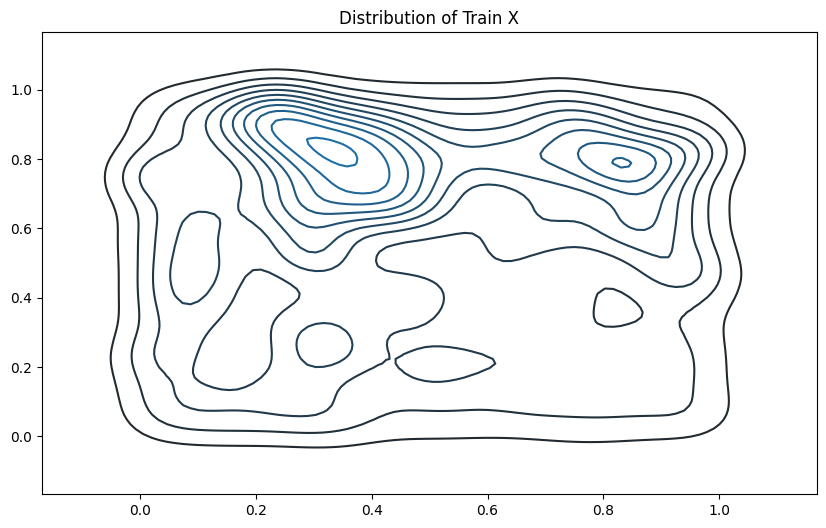

<Figure size 1000x600 with 0 Axes>

In [26]:
#show distribution of train_x_2D, train_y and train_x_2D_sampeled, train_y_sampeled
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import seaborn as sns
#distribution of train_x_2D
plt.figure(figsize=(10, 6))
sns.kdeplot(train_x_2D)
plt.title('Distribution of Train X')
plt.savefig("dist_of_trainX.png")
#distribution of train_y
plt.figure(figsize=(10, 6))
sns.histplot(train_y)
plt.title('Distribution of Train Y')
plt.savefig("dist_of_trainy.png")
#distribution of train_x_2D_sampled
plt.figure(figsize=(10, 6))
sns.kdeplot(train_x_2D_sampeled)
plt.title('Distribution of Sampled X')
plt.savefig("dist_of_sampledx.png")
#distribution of train_y_sampled
plt.figure(figsize=(10, 6))
sns.histplot(train_y_sampeled)
plt.title('Distribution of Sampled y')
plt.savefig("dist_of_sampledy.png")
print("Done!")


In [27]:
! pip install seaborn  